1) Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import LearningRateScheduler


2) Loading and Normalizing the MNIST Dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


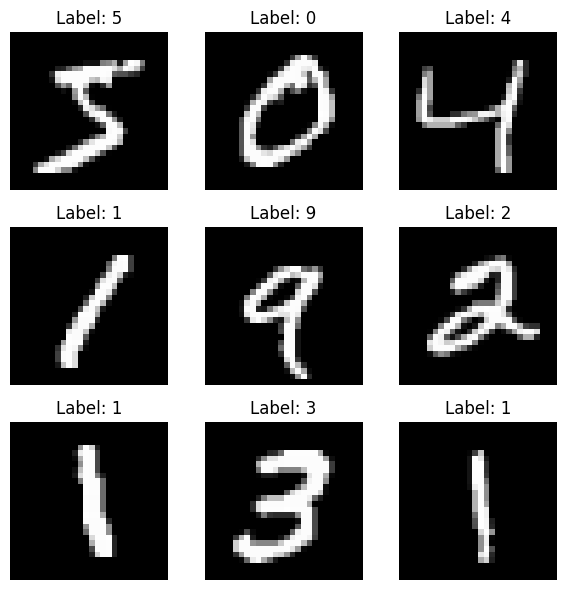

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#displays 9 sample images from the MNIST training dataset
plt.figure(figsize=(6, 6))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()



3) Creating the Model (model_1M)

In [3]:
# Build the model with 1 hidden layer of 121 neurons and ReLU activation
model_1M = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a vector
    Dense(121, activation='relu'),  # Hidden layer with 121 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons for classification (10 classes)
])

# Print the summary of the model to see the architecture
model_1M.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 121)            │        94,985 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,220 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,205 (375.80 KB)

 Trainable params: 96,205 (375.80 KB)

 Non-trainable params: 0 (0.00 B)

4) Defining the Time-Based Decay Function

In [4]:
# Define the Time-based Decay function for learning rate
def lr_time_based_decay(epoch, lr0=0.1, k=0.01):
    return lr0 / (1 + k * epoch)  # Apply the decay formula


5) Compiling and Training the Model with Time-Based Decay

In [6]:
# Define the Learning Rate Scheduler callback for Time-based decay
lr_scheduler = LearningRateScheduler(lambda epoch: lr_time_based_decay(epoch, lr0=0.1, k=0.01))

# Compile the model with SGD optimizer, sparse categorical crossentropy loss, and accuracy metric
model_1M.compile(optimizer=tf.keras.optimizers.SGD(),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model with Time-based decay
history_time = model_1M.fit(x_train, y_train,
                            epochs=50,
                            batch_size=128,
                            validation_data=(x_test, y_test),
                            callbacks=[lr_scheduler],
                            verbose=2)

# Evaluate the model's accuracy on the training and test sets
train_loss_time, train_acc_time = model_1M.evaluate(x_train, y_train, verbose=0)
test_loss_time, test_acc_time = model_1M.evaluate(x_test, y_test, verbose=0)

print(f"\n [Time Decay] Training Accuracy: {train_acc_time:.4f}")
print(f"[Time Decay] Test Accuracy:     {test_acc_time:.4f}")


Epoch 1/50
469/469 - 3s - 7ms/step - accuracy: 0.9617 - loss: 0.1339 - val_accuracy: 0.9629 - val_loss: 0.1292 - learning_rate: 0.1000
Epoch 2/50
469/469 - 1s - 3ms/step - accuracy: 0.9657 - loss: 0.1205 - val_accuracy: 0.9629 - val_loss: 0.1250 - learning_rate: 0.0990
Epoch 3/50
469/469 - 1s - 2ms/step - accuracy: 0.9697 - loss: 0.1098 - val_accuracy: 0.9663 - val_loss: 0.1135 - learning_rate: 0.0980
Epoch 4/50
469/469 - 1s - 3ms/step - accuracy: 0.9714 - loss: 0.1008 - val_accuracy: 0.9672 - val_loss: 0.1066 - learning_rate: 0.0971
Epoch 5/50
469/469 - 2s - 5ms/step - accuracy: 0.9738 - loss: 0.0935 - val_accuracy: 0.9684 - val_loss: 0.1032 - learning_rate: 0.0962
Epoch 6/50
469/469 - 1s - 3ms/step - accuracy: 0.9761 - loss: 0.0869 - val_accuracy: 0.9698 - val_loss: 0.0983 - learning_rate: 0.0952
Epoch 7/50
469/469 - 1s - 2ms/step - accuracy: 0.9772 - loss: 0.0815 - val_accuracy: 0.9712 - val_loss: 0.0955 - learning_rate: 0.0943
Epoch 8/50
469/469 - 2s - 4ms/step - accuracy: 0.9789 -

6) Defining the Step Decay Function

In [7]:
# Define the Step Decay function for learning rate
def decay_step_lr(epoch, lr0=0.1, drop=0.5, epochs_drop=10):
    return lr0 * drop ** np.floor(epoch / epochs_drop)  # Apply the step decay formula


7) Compiling and Training the Model with Step Decay

In [8]:
# Define the Learning Rate Scheduler callback for Step Decay
step_scheduler = LearningRateScheduler(lambda epoch: decay_step_lr(epoch, lr0=0.1, drop=0.5, epochs_drop=10))

# Compile the model again (or reset the model if needed)
model_1M = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(121, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model again for Step Decay
model_1M.compile(optimizer=tf.keras.optimizers.SGD(),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model with Step Decay
history_step = model_1M.fit(x_train, y_train,
                            epochs=50,
                            batch_size=128,
                            validation_data=(x_test, y_test),
                            callbacks=[step_scheduler],
                            verbose=2)

# Evaluate the model's accuracy on the training and test sets
train_loss_step, train_acc_step = model_1M.evaluate(x_train, y_train, verbose=0)
test_loss_step, test_acc_step = model_1M.evaluate(x_test, y_test, verbose=0)

print(f"\n [Step Decay] Training Accuracy: {train_acc_step:.4f}")
print(f" [Step Decay] Test Accuracy:     {test_acc_step:.4f}")


Epoch 1/50
469/469 - 3s - 7ms/step - accuracy: 0.8755 - loss: 0.4595 - val_accuracy: 0.9225 - val_loss: 0.2754 - learning_rate: 0.1000
Epoch 2/50
469/469 - 1s - 2ms/step - accuracy: 0.9272 - loss: 0.2578 - val_accuracy: 0.9350 - val_loss: 0.2268 - learning_rate: 0.1000
Epoch 3/50
469/469 - 1s - 2ms/step - accuracy: 0.9406 - loss: 0.2100 - val_accuracy: 0.9444 - val_loss: 0.1916 - learning_rate: 0.1000
Epoch 4/50
469/469 - 1s - 3ms/step - accuracy: 0.9499 - loss: 0.1784 - val_accuracy: 0.9525 - val_loss: 0.1623 - learning_rate: 0.1000
Epoch 5/50
469/469 - 1s - 2ms/step - accuracy: 0.9559 - loss: 0.1554 - val_accuracy: 0.9563 - val_loss: 0.1471 - learning_rate: 0.1000
Epoch 6/50
469/469 - 1s - 3ms/step - accuracy: 0.9616 - loss: 0.1378 - val_accuracy: 0.9592 - val_loss: 0.1374 - learning_rate: 0.1000
Epoch 7/50
469/469 - 1s - 2ms/step - accuracy: 0.9654 - loss: 0.1238 - val_accuracy: 0.9652 - val_loss: 0.1232 - learning_rate: 0.1000
Epoch 8/50
469/469 - 1s - 3ms/step - accuracy: 0.9694 -

8) Defining the Exponential Decay Function

In [9]:
# Define the Exponential Decay function for learning rate
def decay_exp_lr(epoch, lr0=0.1, k=0.05):
    return lr0 * np.exp(-k * epoch)  # Apply the exponential decay formula


9) Compiling and Training the Model with Exponential Decay

In [11]:
# Define the Learning Rate Scheduler callback for Exponential Decay
exp_scheduler = LearningRateScheduler(lambda epoch: decay_exp_lr(epoch, lr0=0.1, k=0.05))

# Compile the model again (or reset the model if needed)
model_1M = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(121, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model again for Exponential Decay
model_1M.compile(optimizer=tf.keras.optimizers.SGD(),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model with Exponential Decay
history_exp = model_1M.fit(x_train, y_train,
                           epochs=50,
                           batch_size=128,
                           validation_data=(x_test, y_test),
                           callbacks=[exp_scheduler],
                           verbose=2)

# Evaluate the model's accuracy on the training and test sets
train_loss_exp, train_acc_exp = model_1M.evaluate(x_train, y_train, verbose=0)
test_loss_exp, test_acc_exp = model_1M.evaluate(x_test, y_test, verbose=0)

print(f"\n [Exponential Decay] Training Accuracy: {train_acc_exp:.4f}")
print(f" [Exponential Decay] Test Accuracy:     {test_acc_exp:.4f}")


Epoch 1/50
469/469 - 3s - 7ms/step - accuracy: 0.8749 - loss: 0.4643 - val_accuracy: 0.9168 - val_loss: 0.2831 - learning_rate: 0.1000
Epoch 2/50
469/469 - 1s - 2ms/step - accuracy: 0.9265 - loss: 0.2608 - val_accuracy: 0.9355 - val_loss: 0.2248 - learning_rate: 0.0951
Epoch 3/50
469/469 - 1s - 3ms/step - accuracy: 0.9399 - loss: 0.2129 - val_accuracy: 0.9447 - val_loss: 0.1935 - learning_rate: 0.0905
Epoch 4/50
469/469 - 1s - 3ms/step - accuracy: 0.9481 - loss: 0.1819 - val_accuracy: 0.9506 - val_loss: 0.1698 - learning_rate: 0.0861
Epoch 5/50
469/469 - 1s - 2ms/step - accuracy: 0.9555 - loss: 0.1601 - val_accuracy: 0.9571 - val_loss: 0.1507 - learning_rate: 0.0819
Epoch 6/50
469/469 - 1s - 3ms/step - accuracy: 0.9591 - loss: 0.1436 - val_accuracy: 0.9600 - val_loss: 0.1395 - learning_rate: 0.0779
Epoch 7/50
469/469 - 3s - 5ms/step - accuracy: 0.9623 - loss: 0.1308 - val_accuracy: 0.9611 - val_loss: 0.1319 - learning_rate: 0.0741
Epoch 8/50
469/469 - 1s - 3ms/step - accuracy: 0.9658 -

10) Training the Model with Constant Learning Rate (history_const)

In [13]:
# Define a constant learning rate for the model
constant_lr = 0.1

# Build the model (with 1 hidden layer of 121 neurons and ReLU activation)
model_const = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(121, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with constant learning rate
model_const.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=constant_lr),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model with constant learning rate
history_const = model_const.fit(x_train, y_train,
                                epochs=50,
                                batch_size=128,
                                validation_data=(x_test, y_test),
                                verbose=2)

# Evaluate the model's accuracy on the training and test sets
train_loss_const, train_acc_const = model_const.evaluate(x_train, y_train, verbose=0)
test_loss_const, test_acc_const = model_const.evaluate(x_test, y_test, verbose=0)

print(f"\n [Constant Learning Rate] Training Accuracy: {train_acc_const:.4f}")
print(f" [Constant Learning Rate] Test Accuracy:     {test_acc_const:.4f}")


Epoch 1/50
469/469 - 86s - 183ms/step - accuracy: 0.8733 - loss: 0.4692 - val_accuracy: 0.9214 - val_loss: 0.2824
Epoch 2/50
469/469 - 1s - 2ms/step - accuracy: 0.9266 - loss: 0.2618 - val_accuracy: 0.9368 - val_loss: 0.2238
Epoch 3/50
469/469 - 1s - 3ms/step - accuracy: 0.9410 - loss: 0.2105 - val_accuracy: 0.9453 - val_loss: 0.1874
Epoch 4/50
469/469 - 2s - 3ms/step - accuracy: 0.9499 - loss: 0.1782 - val_accuracy: 0.9498 - val_loss: 0.1674
Epoch 5/50
469/469 - 2s - 5ms/step - accuracy: 0.9569 - loss: 0.1543 - val_accuracy: 0.9581 - val_loss: 0.1448
Epoch 6/50
469/469 - 1s - 2ms/step - accuracy: 0.9620 - loss: 0.1366 - val_accuracy: 0.9598 - val_loss: 0.1338
Epoch 7/50
469/469 - 1s - 3ms/step - accuracy: 0.9667 - loss: 0.1223 - val_accuracy: 0.9640 - val_loss: 0.1260
Epoch 8/50
469/469 - 1s - 2ms/step - accuracy: 0.9696 - loss: 0.1107 - val_accuracy: 0.9681 - val_loss: 0.1142
Epoch 9/50
469/469 - 1s - 3ms/step - accuracy: 0.9714 - loss: 0.1018 - val_accuracy: 0.9674 - val_loss: 0.110

11) Plotting the Comparison of Accuracy Curves for Different Learning Rate Schedules

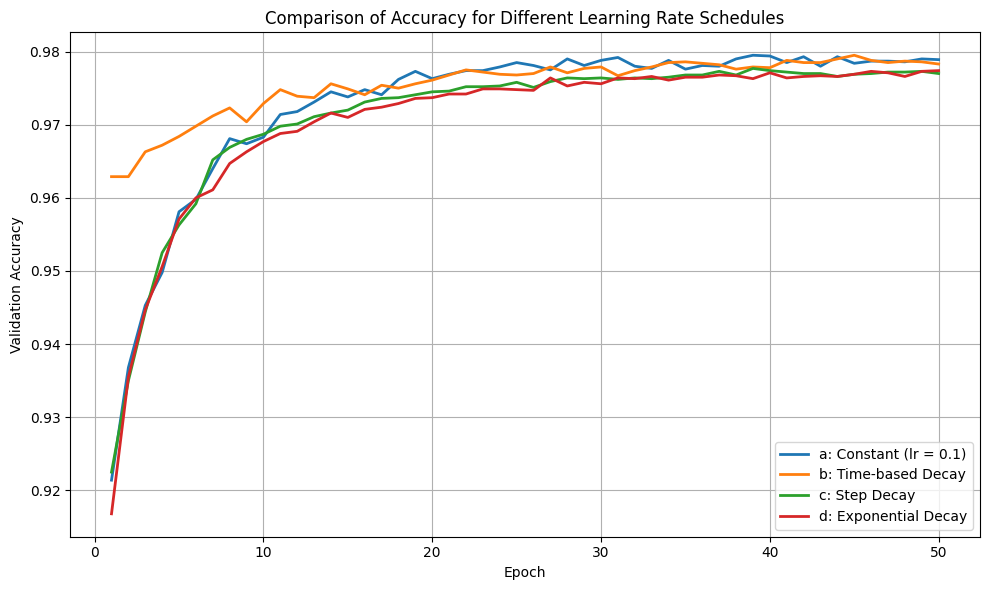

In [14]:
# Extract validation accuracy (val_accuracy) or training accuracy (accuracy)
acc_const = history_const.history['val_accuracy']
acc_time = history_time.history['val_accuracy']
acc_step = history_step.history['val_accuracy']
acc_exp  = history_exp.history['val_accuracy']

# Define epoch range
epochs = range(1, len(acc_const) + 1)

# Plot the comparison of accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc_const, label='a: Constant (lr = 0.1)', linewidth=2)
plt.plot(epochs, acc_time, label='b: Time-based Decay', linewidth=2)
plt.plot(epochs, acc_step, label='c: Step Decay', linewidth=2)
plt.plot(epochs, acc_exp,  label='d: Exponential Decay', linewidth=2)

# Set plot labels and title
plt.title('Comparison of Accuracy for Different Learning Rate Schedules')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


-->Report & Experince



###  **Overall Analysis**:

The comparison chart shows that all four learning rate strategies (Constant, Time-based Decay, Step Decay, and Exponential Decay) perform quite similarly, especially in the later stages of training where the model converges to high accuracy. However, there are some subtle but important differences.



###  **Detailed Comparison of Learning Rate Strategies**:

1. **a: Constant Learning Rate (lr = 0.1)**  
   - Performs very well and remains stable throughout training.  
   - Achieves high accuracy early and maintains it consistently.  
   - In some epochs, it yields the best validation accuracy.  
   - However, it might not fine-tune as precisely as decaying schedules in certain cases.

2. **b: Time-based Decay**  
   - Reaches high accuracy quickly in the early epochs.  
   - Gradual decrease in learning rate allows for steady convergence.  
   - Final accuracy is nearly the same as the constant rate, with smoother transitions.  
   - Good choice for balancing speed and stability in training.

3. **c: Step Decay**  
   - Similar performance overall but slightly less accurate at the end.  
   - Sudden drops in learning rate may introduce small instability.  
   - Useful when specific learning rate changes are needed at fixed intervals.

4. **d: Exponential Decay**  
   - Slightly lower performance compared to others.  
   - Learning rate drops too quickly, possibly limiting later fine-tuning.  
   - Still achieves good accuracy but may not be optimal for prolonged training.

---

###  **Final Conclusion**:

For this experiment, **Constant Learning Rate** and **Time-based Decay** provided the best results in terms of accuracy and convergence behavior.  
- If you want fast and strong performance with minimal complexity, **constant rate** works well.  
- If you need smooth convergence and better control over learning dynamics, **time-based decay** is a strong candidate.

